In [1]:
import pandas as pd

# Assuming wb_data is your DataFrame containing the data
# Filter data for 2020 (the year of Cyclone Amphan) and 2021 (for comparison after the cyclone)
# Load the data
file_path = "E:\MACRO Assignment\Income\Household Income\MasterFile_Income.xlsx"
wb_data = pd.read_excel(file_path, engine='openpyxl')

wb_data['YEAR'] = pd.to_datetime(wb_data['MONTH'], format='%m-%Y').dt.year

# Focus on the affected regions (e.g., Sundarbans or coastal areas affected by Cyclone Amphan)
affected_districts = ['Sundarbans', 'District1', 'District2']  # Replace with actual affected district names

# Filter data for these affected districts
affected_data = wb_data[wb_data['DISTRICT'].isin(affected_districts)]

# Filter data for the year of Cyclone Amphan (2020) and the following year (2021)
amphan_data = wb_data[wb_data['YEAR'] == 2020]
post_amphan_data = wb_data[wb_data['YEAR'] == 2021]

# Now, let's group by district and calculate the total income from various sources for affected and non-affected regions
affected_income = affected_data.groupby('DISTRICT')[['INC_OF_HH_FRM_ALL_SRCS', 'INC_OF_HH_FRM_RENT', 'INC_OF_HH_FRM_SELF_PRODN']].sum().reset_index()
non_affected_income = wb_data[~wb_data['DISTRICT'].isin(affected_districts)].groupby('DISTRICT')[['INC_OF_HH_FRM_ALL_SRCS', 'INC_OF_HH_FRM_RENT', 'INC_OF_HH_FRM_SELF_PRODN']].sum().reset_index()


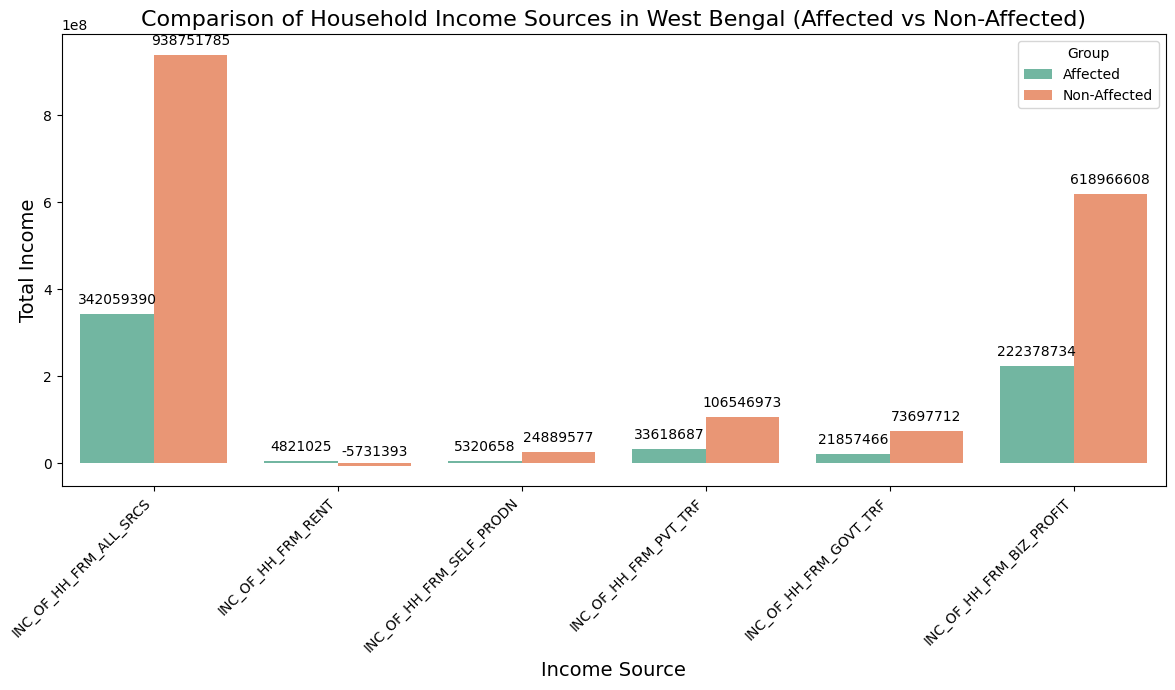

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a list of affected districts (adjust this list based on actual cyclone impact areas)
affected_districts = [
    'South 24 Parganas', 'North 24 Parganas', 'Howrah', 'Hooghly', 'East Midnapore', 
    'West Midnapore', 'Jhargram', 'Purulia', 'Bankura', 'Birbhum', 'Murshidabad', 'Nadia'
    # Add more districts as needed based on cyclone impact
]

# Create a new column 'CYCLONE_IMPACT' to classify the districts as 'Affected' or 'Non-Affected'
wb_data['CYCLONE_IMPACT'] = wb_data['DISTRICT'].apply(lambda x: 'Affected' if x in affected_districts else 'Non-Affected')

# Filter the data for affected and non-affected regions
affected_data = wb_data[wb_data['CYCLONE_IMPACT'] == 'Affected']
non_affected_data = wb_data[wb_data['CYCLONE_IMPACT'] == 'Non-Affected']

# Aggregate income sources for the entire state (West Bengal) before and after the cyclone
# Summing income sources for each group (affected vs non-affected)
affected_income = affected_data[['INC_OF_HH_FRM_ALL_SRCS', 'INC_OF_HH_FRM_RENT', 'INC_OF_HH_FRM_SELF_PRODN', 'INC_OF_HH_FRM_PVT_TRF', 'INC_OF_HH_FRM_GOVT_TRF', 'INC_OF_HH_FRM_BIZ_PROFIT']].sum().reset_index()
non_affected_income = non_affected_data[['INC_OF_HH_FRM_ALL_SRCS', 'INC_OF_HH_FRM_RENT', 'INC_OF_HH_FRM_SELF_PRODN', 'INC_OF_HH_FRM_PVT_TRF', 'INC_OF_HH_FRM_GOVT_TRF', 'INC_OF_HH_FRM_BIZ_PROFIT']].sum().reset_index()

# Rename the columns to make them consistent for both affected and non-affected data
affected_income.columns = ['Income Source', 'Amount']
non_affected_income.columns = ['Income Source', 'Amount']

# Add a new column to indicate whether the data is for 'Affected' or 'Non-Affected' regions
affected_income['Group'] = 'Affected'
non_affected_income['Group'] = 'Non-Affected'

# Combine the data into one DataFrame for comparison
income_comparison = pd.concat([affected_income, non_affected_income])

# Plot the comparison of income sources between affected and non-affected regions
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=income_comparison, x='Income Source', y='Amount', hue='Group', palette='Set2')

# Rotate x-tick labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add numbers above the bars with adjusted positioning
for p in ax.patches:
    # Get the height of each bar
    height = p.get_height()
    
    # Adjust position to avoid overlap
    ax.annotate(f'{height:.0f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Add title and labels
plt.title('Comparison of Household Income Sources in West Bengal (Affected vs Non-Affected)', fontsize=16)
plt.xlabel('Income Source', fontsize=14)
plt.ylabel('Total Income', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()


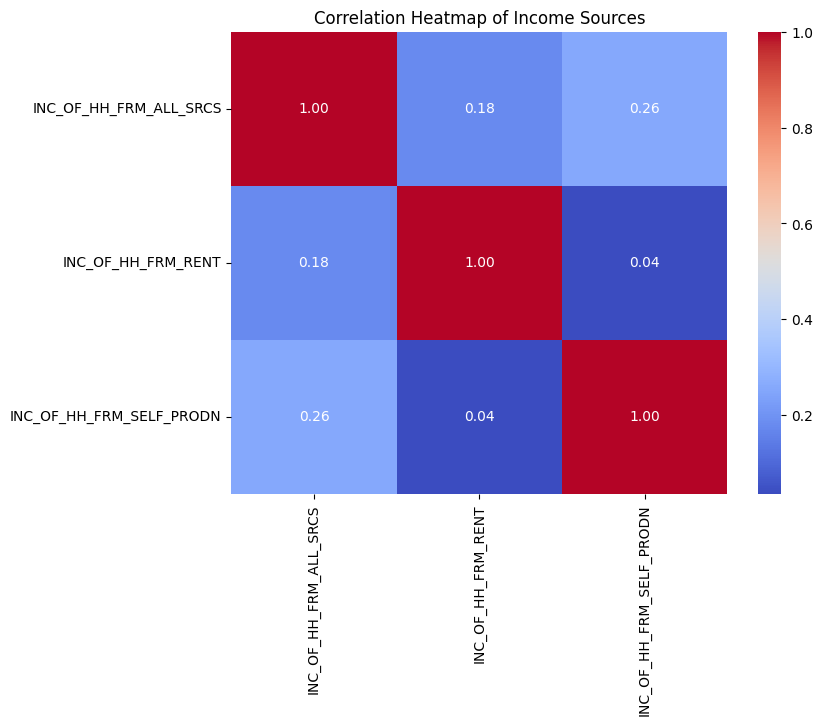

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (replace with actual datasets)
# amphan_data = pd.read_csv('amphan_data.csv')
# post_amphan_data = pd.read_csv('post_amphan_data.csv')

# Filter data for affected districts
affected_districts = ['South 24 Parganas', 'North 24 Parganas', 'Howrah', 'Hooghly', 'East Midnapore', 
    'West Midnapore', 'Jhargram', 'Purulia', 'Bankura', 'Birbhum', 'Murshidabad', 'Nadia']
amphan_data_filtered = amphan_data[amphan_data['DISTRICT'].isin(affected_districts)]
post_amphan_data_filtered = post_amphan_data[post_amphan_data['DISTRICT'].isin(affected_districts)]

# Pre-Cyclone Data (2019)
pre_cyclone_data = amphan_data_filtered[amphan_data_filtered['YEAR'] == 2019]
pre_cyclone_income = pre_cyclone_data[['INC_OF_HH_FRM_ALL_SRCS', 'INC_OF_HH_FRM_RENT', 'INC_OF_HH_FRM_SELF_PRODN']].sum()

# Post-Cyclone Data (2020-2021)
post_cyclone_data = post_amphan_data_filtered[post_amphan_data_filtered['YEAR'].isin([2020, 2021])]
post_cyclone_income = post_cyclone_data[['INC_OF_HH_FRM_ALL_SRCS', 'INC_OF_HH_FRM_RENT', 'INC_OF_HH_FRM_SELF_PRODN']].sum()

# Labels for the income sources
labels = ['All Sources', 'Rent', 'Self Production']

# Graph 4: Correlation Heatmap Between Income Sources (Pre and Post-Cyclone)
income_data = amphan_data_filtered[['INC_OF_HH_FRM_ALL_SRCS', 'INC_OF_HH_FRM_RENT', 'INC_OF_HH_FRM_SELF_PRODN']]
correlation_matrix = income_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Income Sources')
plt.show()

